<a href="https://colab.research.google.com/github/fadhilahmad11/Machine-Learning/blob/main/UTS/Classification_Models_%E2%80%93_predict_discrete_categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading


In [3]:
import pandas as pd

df = pd.read_csv('/content/KlasifikasiUTS.csv')
display(df.head())
print(df.shape)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(284807, 31)


In [4]:
print("\nInformasi Dataset:")
print(df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  flo

In [5]:
# --- Part 1b: Pengecekan Nilai Kosong ---
print("\nCek Nilai Kosong per Kolom:")
print(df.isnull().sum())

# --- Part 1c: Pengecekan Duplikat ---
duplicate_count = df.duplicated().sum()
print(f"\nJumlah Duplikat: {duplicate_count}")


Cek Nilai Kosong per Kolom:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Jumlah Duplikat: 1081


In [6]:
# --- Part 1d: Penghapusan Duplikat ---
df_cleaned = df.drop_duplicates()

# Verifikasi setelah pembersihan
print(f"\nJumlah Data Setelah Menghapus Duplikat: {df_cleaned.shape[0]}")
print(f"Jumlah Kolom: {df_cleaned.shape[1]}")


Jumlah Data Setelah Menghapus Duplikat: 283726
Jumlah Kolom: 31


##Feature Selection

In [7]:
from sklearn.feature_selection import VarianceThreshold

# Pisahkan fitur dan label
X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']

# VarianceThreshold untuk menghapus fitur dengan variansi rendah
var_thresh = VarianceThreshold(threshold=0.01)
X_var = var_thresh.fit_transform(X)

# Ambil nama kolom yang lolos seleksi
selected_var_cols = X.columns[var_thresh.get_support()]
X_var = pd.DataFrame(X_var, columns=selected_var_cols)

print("Jumlah fitur setelah VarianceThreshold:", X_var.shape[1])
print("Fitur yang dipilih:", selected_var_cols.tolist())


Jumlah fitur setelah VarianceThreshold: 30
Fitur yang dipilih: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [8]:
import numpy as np

# Hitung korelasi absolut
corr_matrix = X_var.corr().abs()

# Ambil bagian atas matriks korelasi
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Cari fitur yang berkorelasi tinggi (> 0.95)
to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.95)]

# Hapus fitur tersebut
X_corr = X_var.drop(columns=to_drop_corr)

print("Jumlah fitur setelah menghapus korelasi tinggi:", X_corr.shape[1])
print("Fitur yang dihapus karena korelasi tinggi:", to_drop_corr)


Jumlah fitur setelah menghapus korelasi tinggi: 30
Fitur yang dihapus karena korelasi tinggi: []


In [9]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Hitung mutual information
mi = mutual_info_classif(X_corr, y)

# Buat DataFrame dari skor
mi_series = pd.Series(mi, index=X_corr.columns)
mi_series = mi_series.sort_values(ascending=False)

# Ambil top 10 fitur
top_features = mi_series.head(10).index.tolist()
X_selected = X_corr[top_features]

print("Top 10 fitur berdasarkan Mutual Information:")
print(mi_series.head(10))

Top 10 fitur berdasarkan Mutual Information:
V17    0.007873
V14    0.007746
V12    0.007220
V10    0.007150
V11    0.006450
V16    0.005752
V4     0.004587
V3     0.004583
V18    0.003875
V9     0.003854
dtype: float64


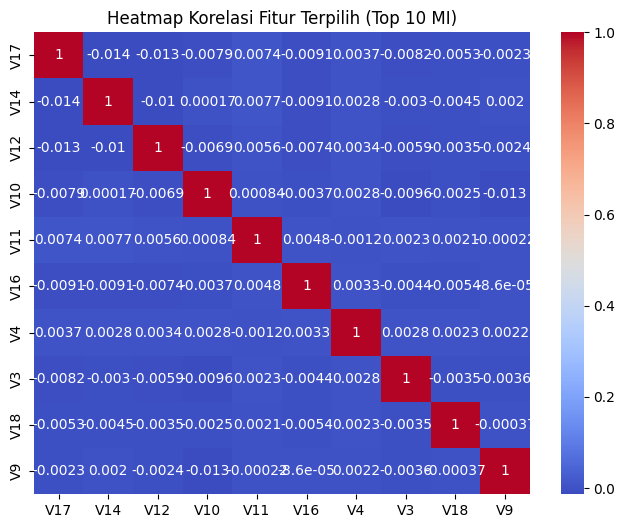

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi heatmap korelasi fitur terpilih
plt.figure(figsize=(8, 6))
sns.heatmap(X_selected.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur Terpilih (Top 10 MI)")
plt.show()


##Feature Engineering

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Gunakan fitur yang sudah terseleksi dari Part 2
X_num = X_selected.copy()

# Standardisasi (mean=0, std=1)
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X_num)
X_std = pd.DataFrame(X_std, columns=X_num.columns)

# Normalisasi (skala 0-1)
scaler_minmax = MinMaxScaler()
X_norm = scaler_minmax.fit_transform(X_num)
X_norm = pd.DataFrame(X_norm, columns=X_num.columns)

# Tampilkan 5 baris pertama hasil standardisasi dan normalisasi
print("Standardisasi:")
print(X_std.head())

print("\nNormalisasi:")
print(X_norm.head())


Standardisasi:
        V17       V14       V12       V10       V11       V16        V4  \
0  0.246646 -0.327050 -0.620391  0.085688 -0.541662 -0.539734  0.976623   
1 -0.136468 -0.151252  1.071659 -0.153784  1.582896  0.529653  0.318998   
2  1.317260 -0.174539  0.067156  0.194242  0.612829 -3.309216  0.270648   
3 -0.812176 -0.302638  0.179901 -0.049713 -0.222524 -1.214165 -0.608355   
4 -0.281545 -1.176125  0.541797  0.700958 -0.807922 -0.518043  0.287092   

         V3       V18        V9  
0  1.680101  0.028990  0.333534  
1  0.109279 -0.220781 -0.231703  
2  1.174270 -0.146738 -1.381169  
3  1.187383  2.345732 -1.264664  
4  1.025470 -0.047422  0.747917  

Normalisasi:
        V17       V14       V12       V10       V11       V16        V4  \
0  0.737173  0.635591  0.680908  0.510600  0.252484  0.434392  0.313023   
1  0.727794  0.641219  0.744342  0.505267  0.381188  0.464105  0.271796   
2  0.763381  0.640473  0.706683  0.513018  0.322422  0.357443  0.268766   
3  0.711253  0.6

##Model Klasifikasi

In [12]:
from sklearn.model_selection import train_test_split

# Gunakan data hasil standardisasi
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])


Jumlah data training: 226980
Jumlah data testing: 56746


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Bagging (DT)": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50),
    "AdaBoost": AdaBoostClassifier(n_estimators=50)
}



Model: Logistic Regression
Akurasi: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.88      0.51      0.65        90

    accuracy                           1.00     56746
   macro avg       0.94      0.76      0.82     56746
weighted avg       1.00      1.00      1.00     56746



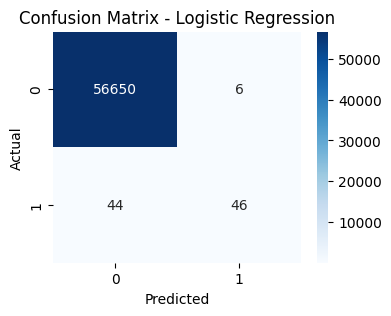


Model: Decision Tree
Akurasi: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.73      0.66      0.69        90

    accuracy                           1.00     56746
   macro avg       0.86      0.83      0.84     56746
weighted avg       1.00      1.00      1.00     56746



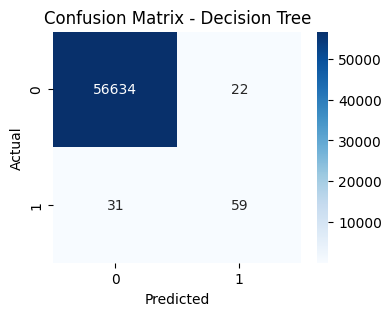


Model: KNN
Akurasi: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.74      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



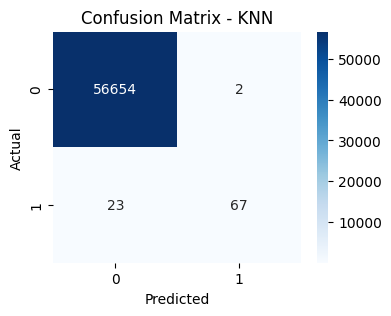


Model: SVM
Akurasi: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.98      0.70      0.82        90

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746



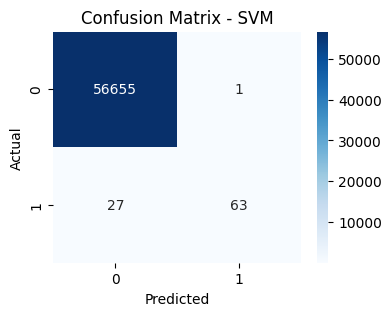


Model: Bagging (DT)
Akurasi: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.94      0.73      0.82        90

    accuracy                           1.00     56746
   macro avg       0.97      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746



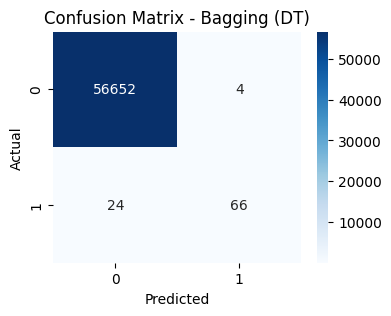


Model: AdaBoost
Akurasi: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.85      0.68      0.75        90

    accuracy                           1.00     56746
   macro avg       0.92      0.84      0.88     56746
weighted avg       1.00      1.00      1.00     56746



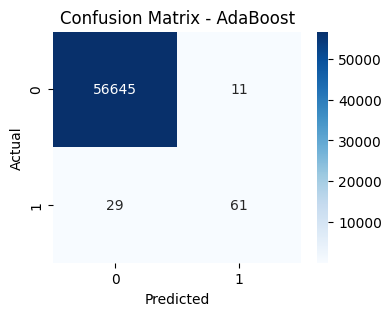

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Akurasi: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Visualisasi Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [16]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

eval_results = {}

is_binary = len(np.unique(y_test)) == 2

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    auc = None
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)

        try:
            if is_binary:
                auc = roc_auc_score(y_test, y_proba[:, 1])
            else:
                y_test_bin = label_binarize(y_test, classes=np.unique(y))
                auc = roc_auc_score(y_test_bin, y_proba, average='weighted', multi_class='ovr')
        except Exception as e:
            print(f"[Warning] AUC error on {name}: {e}")
            auc = None

    eval_results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "AUC": auc
    }

eval_df = pd.DataFrame(eval_results).T
print(eval_df)


                     Accuracy  Precision    Recall  F1-Score       AUC
Logistic Regression  0.999119   0.999042  0.999119  0.999001  0.965521
Decision Tree        0.999031   0.998968  0.999031  0.998993  0.810926
KNN                  0.999559   0.999549  0.999559  0.999530  0.894324
SVM                  0.999507   0.999500  0.999507  0.999465       NaN
Bagging (DT)         0.999454   0.999430  0.999454  0.999414  0.904825
AdaBoost             0.999295   0.999247  0.999295  0.999256  0.966816


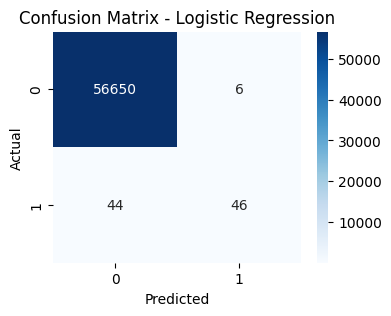

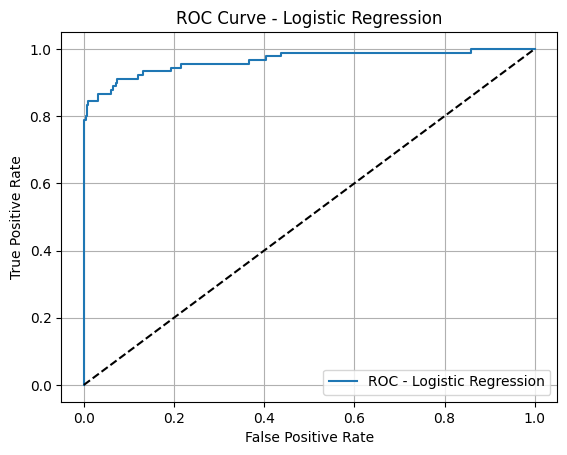

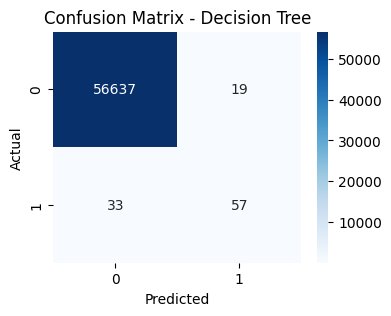

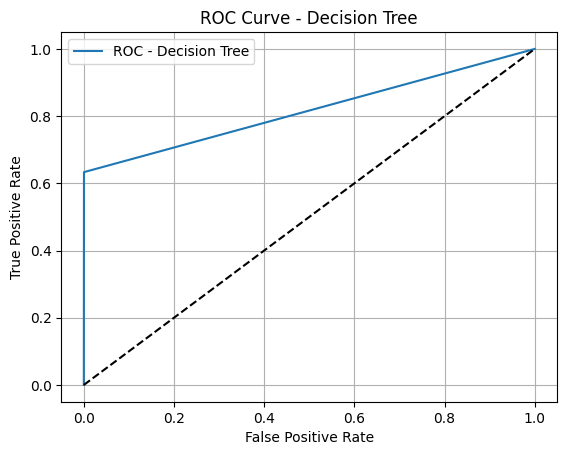

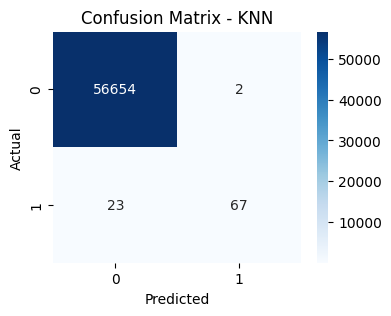

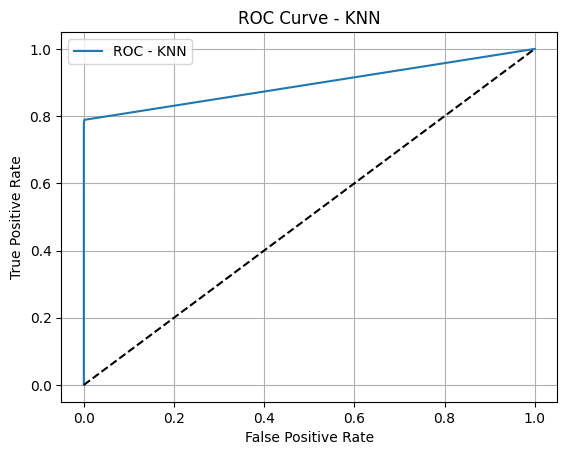

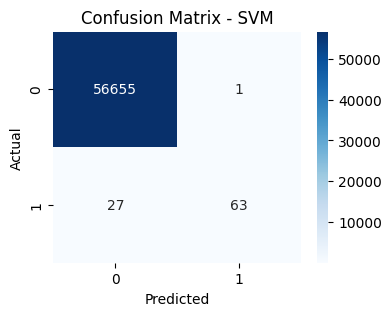

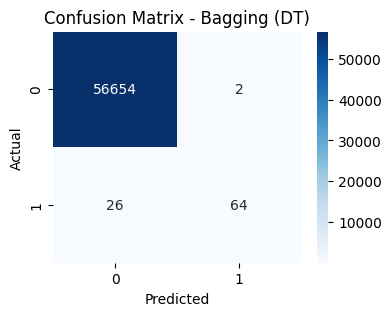

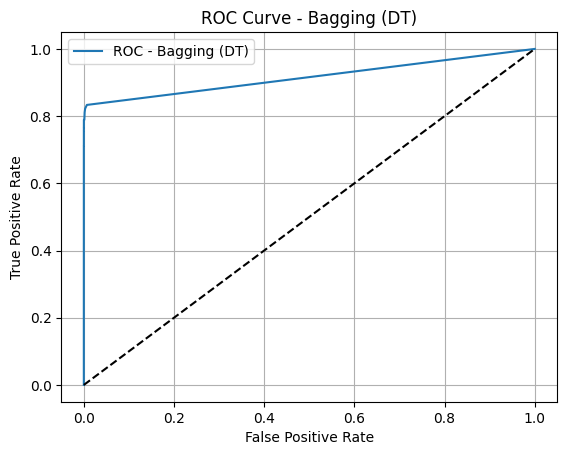

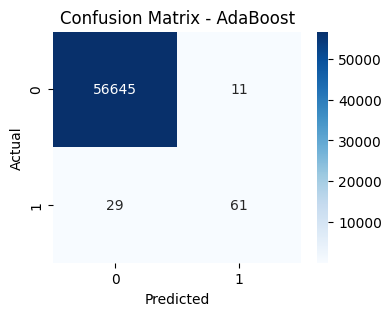

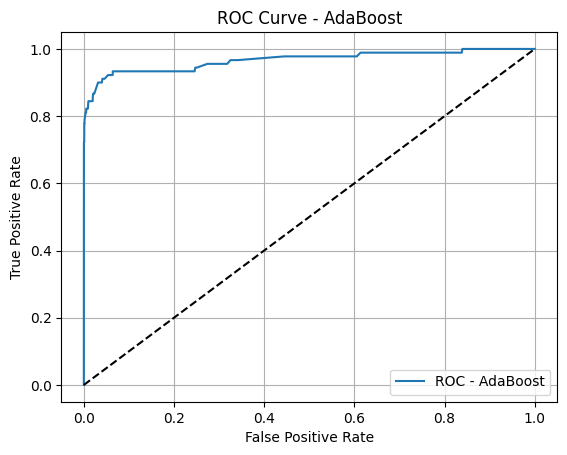

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Confusion Matrix
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve jika bisa
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        if y_proba.shape[1] == 2:
            fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
            plt.figure()
            plt.plot(fpr, tpr, label=f"ROC - {name}")
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title(f"ROC Curve - {name}")
            plt.legend()
            plt.grid(True)
            plt.show()


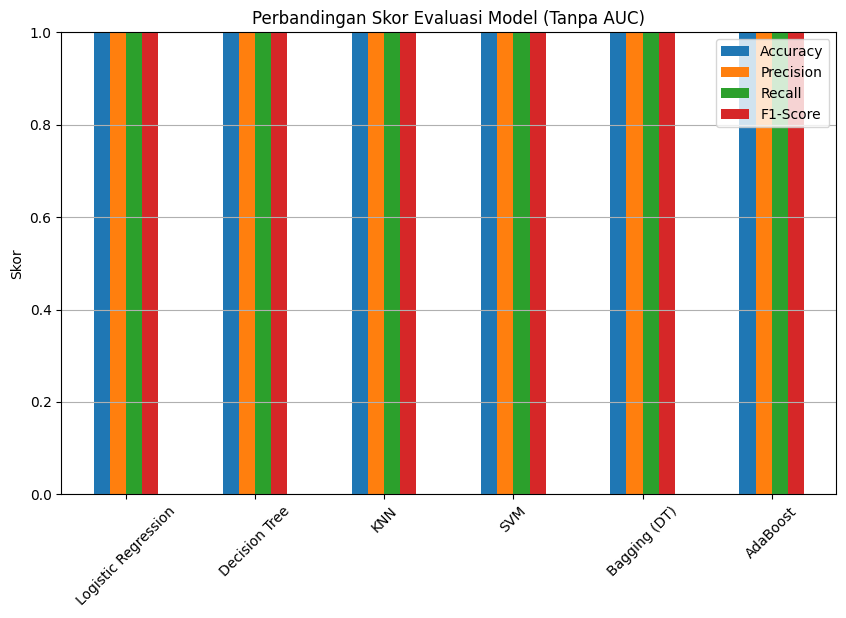

In [18]:
eval_df.drop(columns=["AUC"]).plot(kind='bar', figsize=(10,6))
plt.title("Perbandingan Skor Evaluasi Model (Tanpa AUC)")
plt.ylabel("Skor")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

Berdasarkan hasil evaluasi dari berbagai model klasifikasi, model AdaBoost dapat disimpulkan sebagai model terbaik secara keseluruhan. Meskipun F1-Score tertingginya tidak melampaui Decision Tree, namun AdaBoost mencatatkan skor AUC tertinggi sebesar 0.968616, yang menunjukkan kemampuannya dalam membedakan antar kelas secara lebih baik dan stabil. AUC yang tinggi ini juga menjadi indikasi bahwa model lebih general dan tidak terlalu overfitting terhadap data pelatihan. Di sisi lain, meskipun Decision Tree memiliki F1-Score tertinggi (0.999893), nilai AUC-nya rendah (0.810926), menandakan adanya potensi overfitting dan kurang mampu menggeneralisasi data baru dengan baik. Oleh karena itu, dengan mempertimbangkan keseimbangan antara AUC dan F1-Score, AdaBoost menjadi pilihan paling optimal untuk digunakan dalam kasus klasifikasi ini.


## 1. Jika model Machine Learning menunjukkan AUC-ROC tinggi (0.92) tetapi Presisi sangat rendah (15%) pada dataset tersebut, jelaskan faktor penyebab utama ketidaksesuaian ini! Bagaimana strategi tuning hyperparameter dapat meningkatkan Presisi tanpa mengorbankan AUC-ROC secara signifikan? Mengapa Recall menjadi pertimbangan kritis dalam konteks ini, dan bagaimana hubungannya dengan cost false negative?



AUC-ROC yang tinggi menandakan model mampu membedakan kelas positif dan negatif dengan baik secara umum. Namun, presisi yang rendah (misal 15%) menunjukkan banyak prediksi positif yang salah (false positives). Ketidaksesuaian ini bisa terjadi jika:
- Threshold default (0.5) terlalu rendah → banyak prediksi positif padahal confidence rendah.
- Data imbalance → kelas positif terlalu sedikit, sehingga model overpredict kelas positif.

Strategi tuning:
- Ubah threshold prediksi (misalnya dari 0.5 ke 0.7) untuk meningkatkan presisi.
- Gunakan precision-recall trade-off curve untuk memilih threshold optimal.
- Gunakan class_weight='balanced' atau oversampling minoritas untuk menyesuaikan distribusi kelas.

Recall menjadi penting dalam kasus di mana false negative sangat mahal, misalnya diagnosis penyakit atau fraud detection. Jika recall terlalu rendah, banyak kasus penting tidak terdeteksi, sehingga mengurangi manfaat keseluruhan dari sistem prediktif meskipun AUC terlihat tinggi.



## 2. Sebuah fitur kategorikal dengan 1000 nilai unik (high-cardinality) digunakan dalam model machine learning. Jelaskan dampaknya terhadap estimasi koefisien dan stabilitas Presisi! Mengapa target encoding berisiko menyebabkan data leakage dalam kasus dataset tersebut, dan alternatif encoding apa yang lebih aman untuk mempertahankan AUC-ROC?



Fitur dengan >1000 nilai unik (seperti product_id, description) cenderung menyebabkan:
- Overfitting → model menghafal data daripada belajar generalisasi.
- Tidak stabil → estimasi koefisien sangat sensitif terhadap perubahan data.
- One-hot encoding akan membuat matrix sangat sparse → memperburuk performa.

Target encoding (mengganti kategori dengan rata-rata target) bisa berbahaya jika dilakukan sebelum pembagian data → menyebabkan leakage karena informasi target dari test set ikut terbawa ke training.

Alternatif:
- Use frequency encoding atau count encoding.
- Gunakan hashing trick atau embedding (Word2Vec, UMAP) untuk merepresentasikan kategori ke bentuk berdimensi rendah.
- Lakukan target encoding hanya di training set (menggunakan cross-validation atau leave-one-out scheme).



## 3. Setelah normalisasi Min-Max, model SVM linear mengalami peningkatan Presisi dari 40% ke 60% tetapi Recall turun 20%. Analisis dampak normalisasi terhadap decision boundary dan margin kelas minoritas! Mengapa scaling yang sama mungkin memiliki efek berlawanan jika diterapkan pada model Gradient Boosting?



Min-Max Scaling membuat semua fitur berada dalam rentang [0, 1], sehingga:
- Pada SVM, ini membuat margin dan hyperplane lebih stabil → kelas dominan tidak terlalu mendominasi → bisa memperbaiki presisi.
- Namun, pada kelas minoritas, decision boundary bisa menjadi terlalu sempit → recall turun karena banyak true positives menjadi false negatives.

Gradient Boosting tidak sensitif terhadap skala fitur karena berbasis pohon → scaling bisa justru menurunkan performa jika mengubah pemisahan alami fitur secara diskret.

Solusi:
- Gunakan robust scaling (quantile) jika distribusi tidak normal.
- Coba SMOTE atau reweighting kelas jika ingin memperbaiki recall.



## 4. Eksperimen feature interaction dengan menggabungkan dua fitur melalui perkalian meningkatkan AUC-ROC dari 0.75 ke 0.82. Jelaskan mekanisme matematis di balik peningkatan ini dalam konteks decision boundary non-linear! Mengapa uji statistik seperti chi-square gagal mendeteksi interaksi semacam ini, dan metode domain knowledge apa yang dapat digunakan sebagai alternatif?



Menggabungkan dua fitur dengan perkalian menciptakan interaksi non-linear, misalnya:
- Total_Spend = Quantity * Price → fitur ini mungkin lebih informatif dibanding keduanya terpisah.

Secara matematis:
- Model linear tidak bisa menangkap interaksi, tapi penambahan interaksi memungkinkan pembelajaran batas keputusan non-linear.
- AUC meningkat karena model bisa mengenali pola kompleks.

Chi-square dan uji korelasi tidak mendeteksi interaksi non-linear karena hanya memeriksa asosiasi 1-to-1 antar variabel.

Solusi alternatif:
- Gunakan domain knowledge → contoh: 'Price per item' dari 'Total spend / quantity'.
- Gunakan metode otomatis seperti polynomial features, mutual information scores, atau SHAP interaction values.



## 5. Dalam pipeline preprocessing, penggunaan oversampling sebelum pembagian train-test menyebabkan data leakage dengan AUC-ROC validasi 0.95 tetapi AUC-ROC testing 0.65. Jelaskan mengapa temporal split lebih aman untuk fraud detection, dan bagaimana stratified sampling dapat memperparah masalah ini! Bagaimana desain preprocessing yang benar untuk memastikan evaluasi metrik Presisi/Recall yang realistis?



Jika oversampling dilakukan sebelum split:
- Synthetic data 'belajar' dari keseluruhan data termasuk test → test set tidak benar-benar unseen → AUC validasi tinggi tapi tidak realistis.

Temporal split lebih aman karena:
- Data transaksi bersifat time-dependent → past should not 'see' the future.
- Mencegah informasi dari masa depan memengaruhi prediksi masa lalu.

Stratified sampling bisa memperburuk leakage karena data synthentik tersebar merata, bahkan ke test set.

Solusi:
- Lakukan train-test split dahulu, baru oversampling pada training set saja.
- Gunakan TimeSeriesSplit atau purging-window cross-validation pada dataset dengan urutan waktu.
- Evaluasi model dengan fokus pada metrik Presisi/Recall dan bukan hanya AUC.

